In [2]:

import pandas as pd 
import os 
from datetime import datetime 
import matplotlib.pyplot as plt

In [3]:

# date = datetime.now().strftime("%Y%m%d")
# pi = pd.read_excel('Data/raw/LUAD Clinical Data.xlsx')

# Get current directory
path = os.getcwd()
data_path = path + '/Data/'

# Set path 
data = pd.read_csv(f"{data_path}/clustering/full_cd_clus_19_39_48.csv")

# df = pd.read_csv(f"{data_path}/clustered/full_cd_clus_20_40_49.csv").rename(columns={'cluster': 'agglomerateto_275'})
df_loc = pd.read_csv(f"{data_path}/celldata/celldata_20240506.csv")[['cellID', 'Location_Center_X', 'Location_Center_Y']].rename(columns={'cellID': 'source_ID', 'cluster': 'agglomerateto_275'})

# Merge location data 
df_full= pd.merge(data, df_loc, on='source_ID', how='inner')
df_full

,Patient_ID,source_ID,source_cluster,Alt.MAC,B,Cancer,Cl_Mac,Cl_Mo,DC,Endothelial,...,Th,Treg,Unknown,cluster,agglomerateto_19,agglomerateto_39,agglomerateto_48,surv_5y,Location_Center_X,Location_Center_Y
0,LUAD_D001,D001_0,Cancer,0.166667,0.0,0.166667,0.166667,0.0,0.0,0.000000,...,0.333333,0.000000,0.000000,1,7,27,27,1,93,159
1,LUAD_D001,D001_1,Tc,0.000000,0.0,0.285714,0.000000,0.0,0.0,0.000000,...,0.285714,0.000000,0.428571,2,17,34,34,1,74,186
2,LUAD_D001,D001_10,Th,0.000000,0.0,0.363636,0.272727,0.0,0.0,0.000000,...,0.090909,0.000000,0.000000,3,1,5,47,1,120,149
3,LUAD_D001,D001_100,Cancer,0.000000,0.0,0.714286,0.000000,0.0,0.0,0.142857,...,0.000000,0.000000,0.142857,4,9,7,3,1,4,407
4,LUAD_D001,D001_1000,Treg,0.000000,0.0,0.000000,0.083333,0.0,0.0,0.083333,...,0.250000,0.000000,0.333333,1,7,27,27,1,782,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637717,LUAD_D416,D416_995,Unknown,0.000000,0.0,0.166667,0.500000,0.0,0.0,0.000000,...,0.166667,0.000000,0.166667,44,1,39,39,1,275,835
1637718,LUAD_D416,D416_996,Cl_Mac,0.000000,0.0,0.400000,0.200000,0.0,0.0,0.000000,...,0.000000,0.000000,0.200000,72,1,6,2,1,110,858
1637719,LUAD_D416,D416_997,Cancer,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.000000,0.333333,0.333333,146,2,31,31,1,153,908
1637720,LUAD_D416,D416_998,Cl_Mac,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.333333,0.000000,0.166667,1,7,27,27,1,155,842


In [4]:
# Color specifications
# Order of celltypes for plotting
ct_order = ['Cancer', 'Endothelial',   'Alt_Mac', 'Cl_Mac', 'Cl_Mo','Int_Mo', 'Non-Cl_Mo', 'DC',  'Neutrophil','Mast', 'NK', 'B', 'T_other', 'Tc', 'Th', 'Treg', 'Unknown']

# Color cell type combinations for plotting
cell_type_colors = {
    'Cancer': '#FF0000',             # Red
    'Alt_Mac': '#0000FF',            # blue 
    'Cl_Mac': '#4169E1',             # blue
    'Cl_Mo': '#0096FF',              # blue
    'Int_Mo': '#00FFFF',             # ''
    'Non-Cl_Mo': '#87CEEB',          # ''
    'Mast': '#FFFF00',          # Yellow
    'B': '#C4A484',             # brown
    'DC': '#6A0DAD',           # purple
    'Endothelial': '#FFA500',   # Orange
    'NK': '#FFC0CB',            # pink
    'Neutrophil': '#FF00FF',        # magenta
    'T_other': '#66CDAA',            # green
    'Tc': '#008000',                 # Green
    'Th': '#2E8B57',                 # Green (similar to 'Tc')
    'Treg': '#3CB371',               # Green
    'Unknown': '#808080'             # Gray
}
# Cluster numbers with highest treg content in clus = 39
treg_clusters_relevant = [28, 26, 27, 37, 5, 24, 34, 22, 39, 12, 20, 21]

# 49 colors that are (relatively distinct) for clusters
colors = [
    "#e7ba52", "#e7cb94", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#b5cf6b", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
    "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5",
    "#393b79", "#5254a3", "#6b6ecf", "#9c9ede", "#637939",
    "#8ca252", "#7f7f7f", "#ff7f0e", "#8c6d31", "#bd9e39",
    "#1f77b4", "#cedb9c", "#843c39", "#ad494a", "#d6616b",
    "#e7969c", "#7b4173", "#a55194", "#ce6dbd", "#de9ed6",
    "#3182bd", "#6baed6", "#9ecae1", "#c6dbef", "#e6550d",
    "#fd8d3c", "#fdae6b", "#fdd0a2", "#31a354", "#74c476"
]


In [22]:
df_full

,Patient_ID,source_ID,source_cluster,Alt.MAC,B,Cancer,Cl_Mac,Cl_Mo,DC,Endothelial,...,Th,Treg,Unknown,cluster,agglomerateto_19,agglomerateto_39,agglomerateto_48,surv_5y,Location_Center_X,Location_Center_Y
0,LUAD_D001,D001_0,Cancer,0.166667,0.0,0.166667,0.166667,0.0,0.0,0.000000,...,0.333333,0.000000,0.000000,1,7,27,27,1,93,159
1,LUAD_D001,D001_1,Tc,0.000000,0.0,0.285714,0.000000,0.0,0.0,0.000000,...,0.285714,0.000000,0.428571,2,17,34,34,1,74,186
2,LUAD_D001,D001_10,Th,0.000000,0.0,0.363636,0.272727,0.0,0.0,0.000000,...,0.090909,0.000000,0.000000,3,1,5,47,1,120,149
3,LUAD_D001,D001_100,Cancer,0.000000,0.0,0.714286,0.000000,0.0,0.0,0.142857,...,0.000000,0.000000,0.142857,4,9,7,3,1,4,407
4,LUAD_D001,D001_1000,Treg,0.000000,0.0,0.000000,0.083333,0.0,0.0,0.083333,...,0.250000,0.000000,0.333333,1,7,27,27,1,782,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637717,LUAD_D416,D416_995,Unknown,0.000000,0.0,0.166667,0.500000,0.0,0.0,0.000000,...,0.166667,0.000000,0.166667,44,1,39,39,1,275,835
1637718,LUAD_D416,D416_996,Cl_Mac,0.000000,0.0,0.400000,0.200000,0.0,0.0,0.000000,...,0.000000,0.000000,0.200000,72,1,6,2,1,110,858
1637719,LUAD_D416,D416_997,Cancer,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.000000,0.333333,0.333333,146,2,31,31,1,153,908
1637720,LUAD_D416,D416_998,Cl_Mac,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.333333,0.000000,0.166667,1,7,27,27,1,155,842


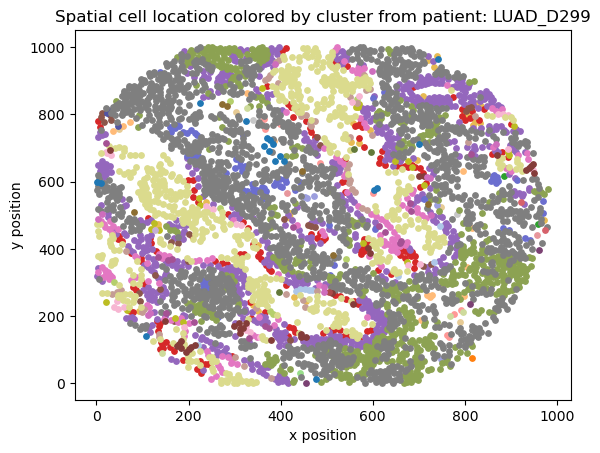

In [20]:
def show_spatial_clus(data, patient, no_clus=20, interesting_clusters=None, mark_celltype=False, legend=True):
    pat_df = data.loc[data['Patient_ID'] == patient]
    if not interesting_clusters:
        for cluster in range(1, no_clus+1): 
            clus_df = pat_df.loc[pat_df[f'agglomerateto_{no_clus}'] == cluster]
            plt.scatter(clus_df['Location_Center_X'], clus_df['Location_Center_Y'], color=colors[cluster-1],marker="o", s=15, label=cluster)
    else:
        for cluster in range(1, no_clus+1): 
            clus_df = pat_df.loc[pat_df[f'agglomerateto_{no_clus}'] == cluster]
            if cluster in interesting_clusters:
                plt.scatter(clus_df['Location_Center_X'], clus_df['Location_Center_Y'], color=colors[cluster-1],marker="o", s=15, label=cluster)
            else:
                plt.scatter(clus_df['Location_Center_X'], clus_df['Location_Center_Y'], color="#000000",marker="o", s=15, label='rest')
                    
                    
    if mark_celltype:
        plt.scatter(pat_df[pat_df['source_cluster'] == mark_celltype]['Location_Center_X'], pat_df[pat_df['source_cluster'] == mark_celltype]['Location_Center_Y'], color="red",marker="x",edgecolors=None, s=5, label=mark_celltype)

        
    # Get unique labels
    handles, labels = plt.gca().get_legend_handles_labels()
    unique_labels = {}
    for handle, label in zip(handles, labels):
        if label not in unique_labels:
            unique_labels[label] = handle
    if legend:
        plt.legend(unique_labels.values(), unique_labels.keys(),bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('x position')
    plt.ylabel('y position')
    plt.title(f'Spatial cell location colored by cluster from patient: {patient}')
    return None




# show_spatial_clus(df_full, 'LUAD_D003', 40)
show_spatial_clus(df_full, 'LUAD_D299', 39, interesting_clusters=range(1,40), mark_celltype='B cell', legend=False)
# show_spatial_clus(df_full, 'LUAD_D299', 39, interesting_clusters=treg_clusters_relevant, mark_celltype='B cell')

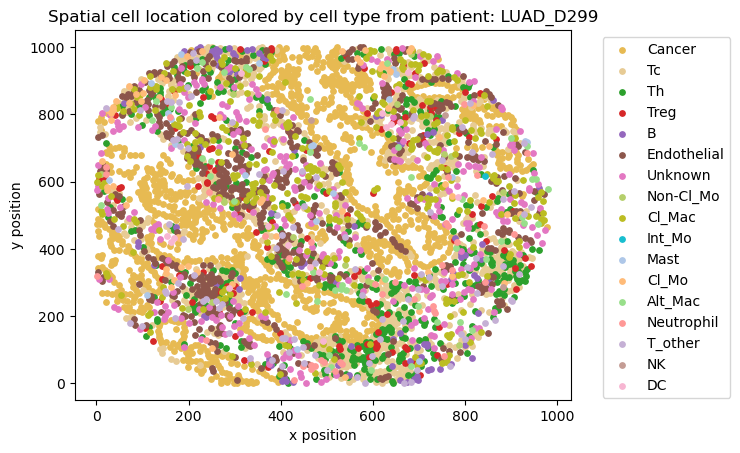

In [21]:
def show_spatial_cts(data, patient, no_cts=17, interesting_cts=None, mark_celltype=False):
    pat_df = data.loc[data['Patient_ID'] == patient]
    for ct in range(1, no_cts+1): 
        ct_df = pat_df.loc[pat_df['source_cluster'] == interesting_cts[ct-1]]
        plt.scatter(ct_df['Location_Center_X'], ct_df['Location_Center_Y'], color=colors[ct-1],marker="o", s=15, label=interesting_cts[ct-1])
    # else:
    #     for cluster in range(1, no_clus+1): 
    #         clus_df = pat_df.loc[pat_df[f'agglomerateto_{no_clus}'] == cluster]
    #         if cluster in interesting_clusters:
    #             plt.scatter(clus_df['Location_Center_X'], clus_df['Location_Center_Y'], color=colors[cluster-1],marker="o", s=15, label=cluster)
    #         else:
    #             plt.scatter(clus_df['Location_Center_X'], clus_df['Location_Center_Y'], color="#000000",marker="o", s=15, label='rest')
                    
                    
    # if mark_celltype:
    #     plt.scatter(pat_df[pat_df['source_cluster'] == mark_celltype]['Location_Center_X'], pat_df[pat_df['source_cluster'] == mark_celltype]['Location_Center_Y'], color="red",marker="x",edgecolors=None, s=5, label=mark_celltype)

        
    # Get unique labels
    handles, labels = plt.gca().get_legend_handles_labels()
    unique_labels = {}
    for handle, label in zip(handles, labels):
        if label not in unique_labels:
            unique_labels[label] = handle

    plt.legend(unique_labels.values(), unique_labels.keys(),bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('x position')
    plt.ylabel('y position')
    plt.title(f'Spatial cell location colored by cell type from patient: {patient}')
    return None



cts = df_full['source_cluster'].unique()
# show_spatial_clus(df_full, 'LUAD_D003', 40)
show_spatial_cts(df_full, 'LUAD_D299', no_cts=17, interesting_cts=cts, mark_celltype=None)

In [16]:
len(cts)

17

In [25]:
temp_df = df_full[df_full['source_cluster'] == 'Cancer']
temp_df

,Patient_ID,source_ID,source_cluster,Alt.MAC,B,Cancer,Cl_Mac,Cl_Mo,DC,Endothelial,...,Th,Treg,Unknown,cluster,agglomerateto_19,agglomerateto_39,agglomerateto_48,surv_5y,Location_Center_X,Location_Center_Y
0,LUAD_D001,D001_0,Cancer,0.166667,0.0,0.166667,0.166667,0.0,0.0,0.000000,...,0.333333,0.000000,0.000000,1,7,27,27,1,93,159
3,LUAD_D001,D001_100,Cancer,0.000000,0.0,0.714286,0.000000,0.0,0.0,0.142857,...,0.000000,0.000000,0.142857,4,9,7,3,1,4,407
9,LUAD_D001,D001_1005,Cancer,0.000000,0.0,0.625000,0.000000,0.0,0.0,0.125000,...,0.000000,0.000000,0.000000,6,9,7,3,1,704,287
10,LUAD_D001,D001_1006,Cancer,0.000000,0.0,0.500000,0.000000,0.0,0.0,0.166667,...,0.000000,0.000000,0.166667,6,9,7,3,1,699,344
12,LUAD_D001,D001_1008,Cancer,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,7,9,19,19,1,689,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637702,LUAD_D416,D416_981,Cancer,0.000000,0.0,0.714286,0.000000,0.0,0.0,0.000000,...,0.142857,0.000000,0.000000,203,9,4,9,1,154,785
1637710,LUAD_D416,D416_989,Cancer,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,7,9,19,19,1,203,808
1637715,LUAD_D416,D416_993,Cancer,0.000000,0.0,0.666667,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.333333,48,9,17,17,1,297,975
1637719,LUAD_D416,D416_997,Cancer,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.000000,0.333333,0.333333,146,2,31,31,1,153,908
